# Polynomial Regression — Understanding Degrees and Overfitting

## What is Polynomial Regression?

**Polynomial Regression** fits a polynomial curve (instead of a straight line) to the data.

### Linear vs Polynomial

**Linear Regression:**
- Model: y = θ₀ + θ₁·x
- Fits a straight line
- Use when relationship is linear

**Polynomial Regression (degree 2):**
- Model: y = θ₀ + θ₁·x + θ₂·x²
- Fits a curved (parabolic) line
- Captures non-linear patterns

**Polynomial Regression (degree d):**
- Model: y = θ₀ + θ₁·x + θ₂·x² + θ₃·x³ + ... + θ_d·x^d
- Fits increasingly complex curves
- More flexibility, but risk of overfitting

---

## How Polynomial Regression Works

1. **Transform features**: Create polynomial features from original features
   - Original: X = [x₁, x₂, x₃, ...]
   - Degree 2: X_poly = [1, x₁, x₂, ..., x₁², x₁·x₂, ...]
   - Each new feature is a combination of original features (powers and interactions)

2. **Fit linear model**: Use LinearRegression on polynomial features
   - Internally: y = θ₀ + θ₁·x₁ + θ₂·x₁² + ...

3. **Predict**: Make predictions using the fitted polynomial

---

## Degree and Error Trade-off

### Degree 1 (Linear)
```
y = θ₀ + θ₁·x
Training Error: HIGH (underfitting)
Test Error: HIGH
Reason: Too simple, doesn't capture curve
```

### Degree 2 (Quadratic)
```
y = θ₀ + θ₁·x + θ₂·x²
Training Error: LOWER
Test Error: REASONABLE
Reason: Fits curve well, generalizes
```

### Degree 3, 4, 5... (Higher)
```
y = θ₀ + θ₁·x + θ₂·x² + θ₃·x³ + ...
Training Error: VERY LOW ✓
Test Error: VERY HIGH ✗
Reason: Overfitting — memorizing noise, not learning pattern
```

---

## Visual Pattern

```
Error
  │
  │ Training Error
  │ ╲
  │  ╲___     (decreases as degree increases)
  │      
  │         Test Error
  │      ╱╲  (U-shaped: optimal around degree 2-3)
  │   ╱╱   ╲╲
  │  ╱       ╲╲___
  │          
  └─────────────────── Degree
    1  2  3  4  5  6
         ↑
      Sweet spot
```

---

## Key Insights

**Increasing degree → Decreasing training error**
- More features = model fits training data better
- But this doesn't mean better generalization!

**Overfitting with high degree:**
- Degree 1: Underfits (too simple)
- Degree 2-3: Goldilocks zone (good fit + generalization)
- Degree 10+: Overfits (wiggles through every noise point)

---

## How to Choose the Right Degree?

1. **Start with degree 1** (linear) — baseline
2. **Try degree 2-3** — usually optimal for most datasets
3. **Check test/validation error** — pick degree with lowest test error, not training error
4. **Avoid degrees > 5** unless you have strong evidence from validation data
5. **Use cross-validation** — reliable way to compare degrees

---

## In This Notebook

- True relationship: y = 3x + 5x² + 9 + noise (degree 2)
- We'll fit a degree 2 polynomial and extract the learned coefficients
- You can experiment with degree 1, 3, 4 to see training vs test error

In [31]:
# Common imports
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
#Plot X, y to visualize the data
def plot_data(X, y):
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.xlabel('Feature 1')
    plt.ylabel('Target')
    plt.title('Data Visualization')
    plt.legend()
    plt.show()

In [ ]:
def compute_weights(X, y_actual):
    #This will compute the weights for a polynomial regression model of degree 2. 
    # include_bias=False means we are not adding the bias term (intercept) as a separate feature, since LinearRegression will handle it internally.
    poly_features = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_actual)
    return lin_reg.intercept_, lin_reg.coef_

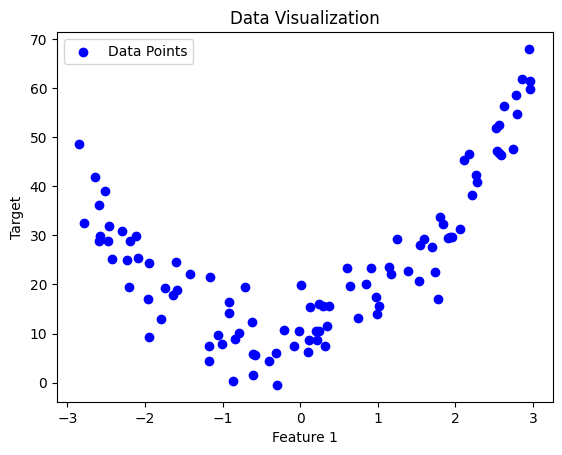

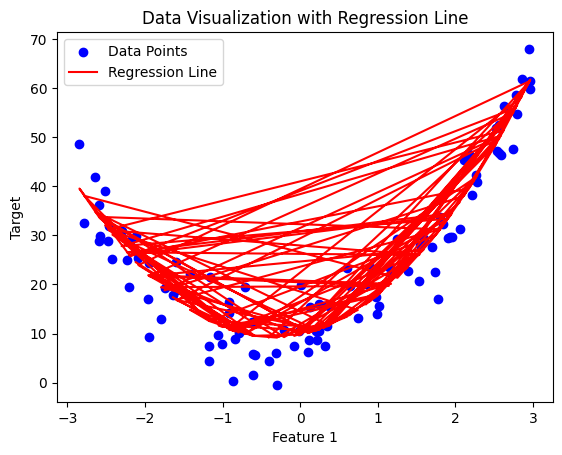

Intercept: [9.73952658]
Coefficients: [[3.24292423 4.81994822]]


In [ ]:
m = 100
features= 6 * np.random.rand(m,1) - 3  #features between -3 and 3
weights_actual = np.array([3, 9, 5]).reshape(-1, 1)  # bias 3, theta_1=9, theta_2=5
#creating a polynomial relation with some noise
#y = 5x2^2 + 3x + 9. Also adding some noise using np.random.randn to simulate real-world data 
y_actual = (3 * features + 5 * features**2 + 9).reshape(-1,1) + 5 *np.random.randn(m,1)
plot_data(features, y_actual)
intercept, coef = compute_weights(features, y_actual)
print("Intercept:", intercept)
print("Coefficients:", coef)